In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [2]:
df = pd.read_csv("../data/raw/Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
print(df.dtypes)
print("-----------------------------")
print(df.select_dtypes(include=["int", "float"]))

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
-----------------------------
        price  area  bedrooms  bathrooms  stories  parking
0    13300000  7420         4          2        3        2
1    12250000  8960         4          4        4        3
2    12250000  9960         3          2        2        2
3    12215000  7500         4          2        2        3
4    11410000  7420         4          1        2        2
..        ...   ...       ...        ...      ...      ...
540   1820000  3000         2          1        1        2
541   1767150  2400         3          1        1        0
542   1750000  3620         2          1        1        0
543   1750000  

In [7]:
df.isnull().value_counts()

price  area   bedrooms  bathrooms  stories  mainroad  guestroom  basement  hotwaterheating  airconditioning  parking  prefarea  furnishingstatus
False  False  False     False      False    False     False      False     False            False            False    False     False               545
Name: count, dtype: int64

In [8]:
df.select_dtypes(include=["object"])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [9]:
test_df = df.select_dtypes(include=["object"])

In [10]:
test_mainroad = test_df.replace(["yes", "no", 'furnished', 'semi-furnished', 'unfurnished'], [1, 0, 2, 1, 0])
test_mainroad

/var/folders/4l/bwhrbrw57k1djc2163f5ggcc0000gn/T/ipykernel_2213/3513361073.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_mainroad = test_df.replace(["yes", "no", 'furnished', 'semi-furnished', 'unfurnished'], [1, 0, 2, 1, 0])


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,2
1,1,0,0,0,1,0,2
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,2
4,1,1,1,0,1,0,2
...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,0
541,0,0,0,0,0,0,1
542,1,0,0,0,0,0,0
543,0,0,0,0,0,0,2


In [11]:
df[df.select_dtypes(include=["object"]).columns] = (
    df.select_dtypes(include=["object"])
      .replace(["yes", "no", "furnished", "semi-furnished", "unfurnished"], [1, 0, 2, 1, 0])
)


/var/folders/4l/bwhrbrw57k1djc2163f5ggcc0000gn/T/ipykernel_2213/103122440.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(["yes", "no", "furnished", "semi-furnished", "unfurnished"], [1, 0, 2, 1, 0])


In [12]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


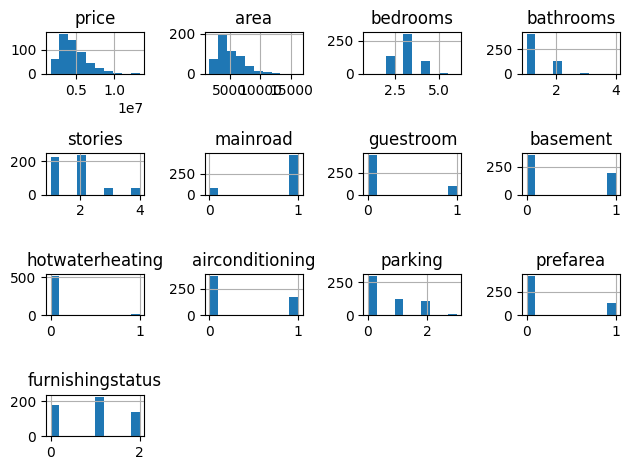

In [19]:
df.select_dtypes(include="int64").hist()
#plt.legend(['Marks scored'], fontsize = 10)
plt.tight_layout()
plt.show()

<Axes: >

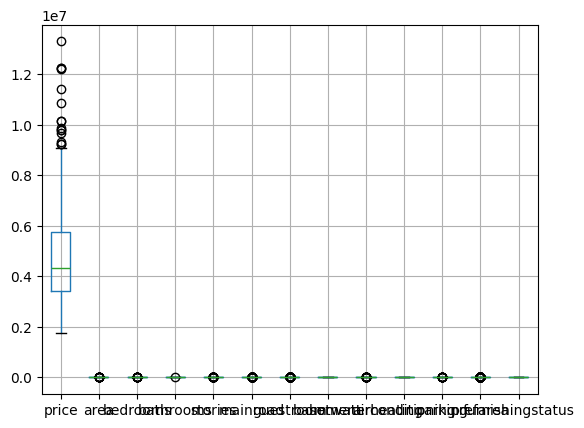

In [20]:
df.select_dtypes(include="int64").boxplot()

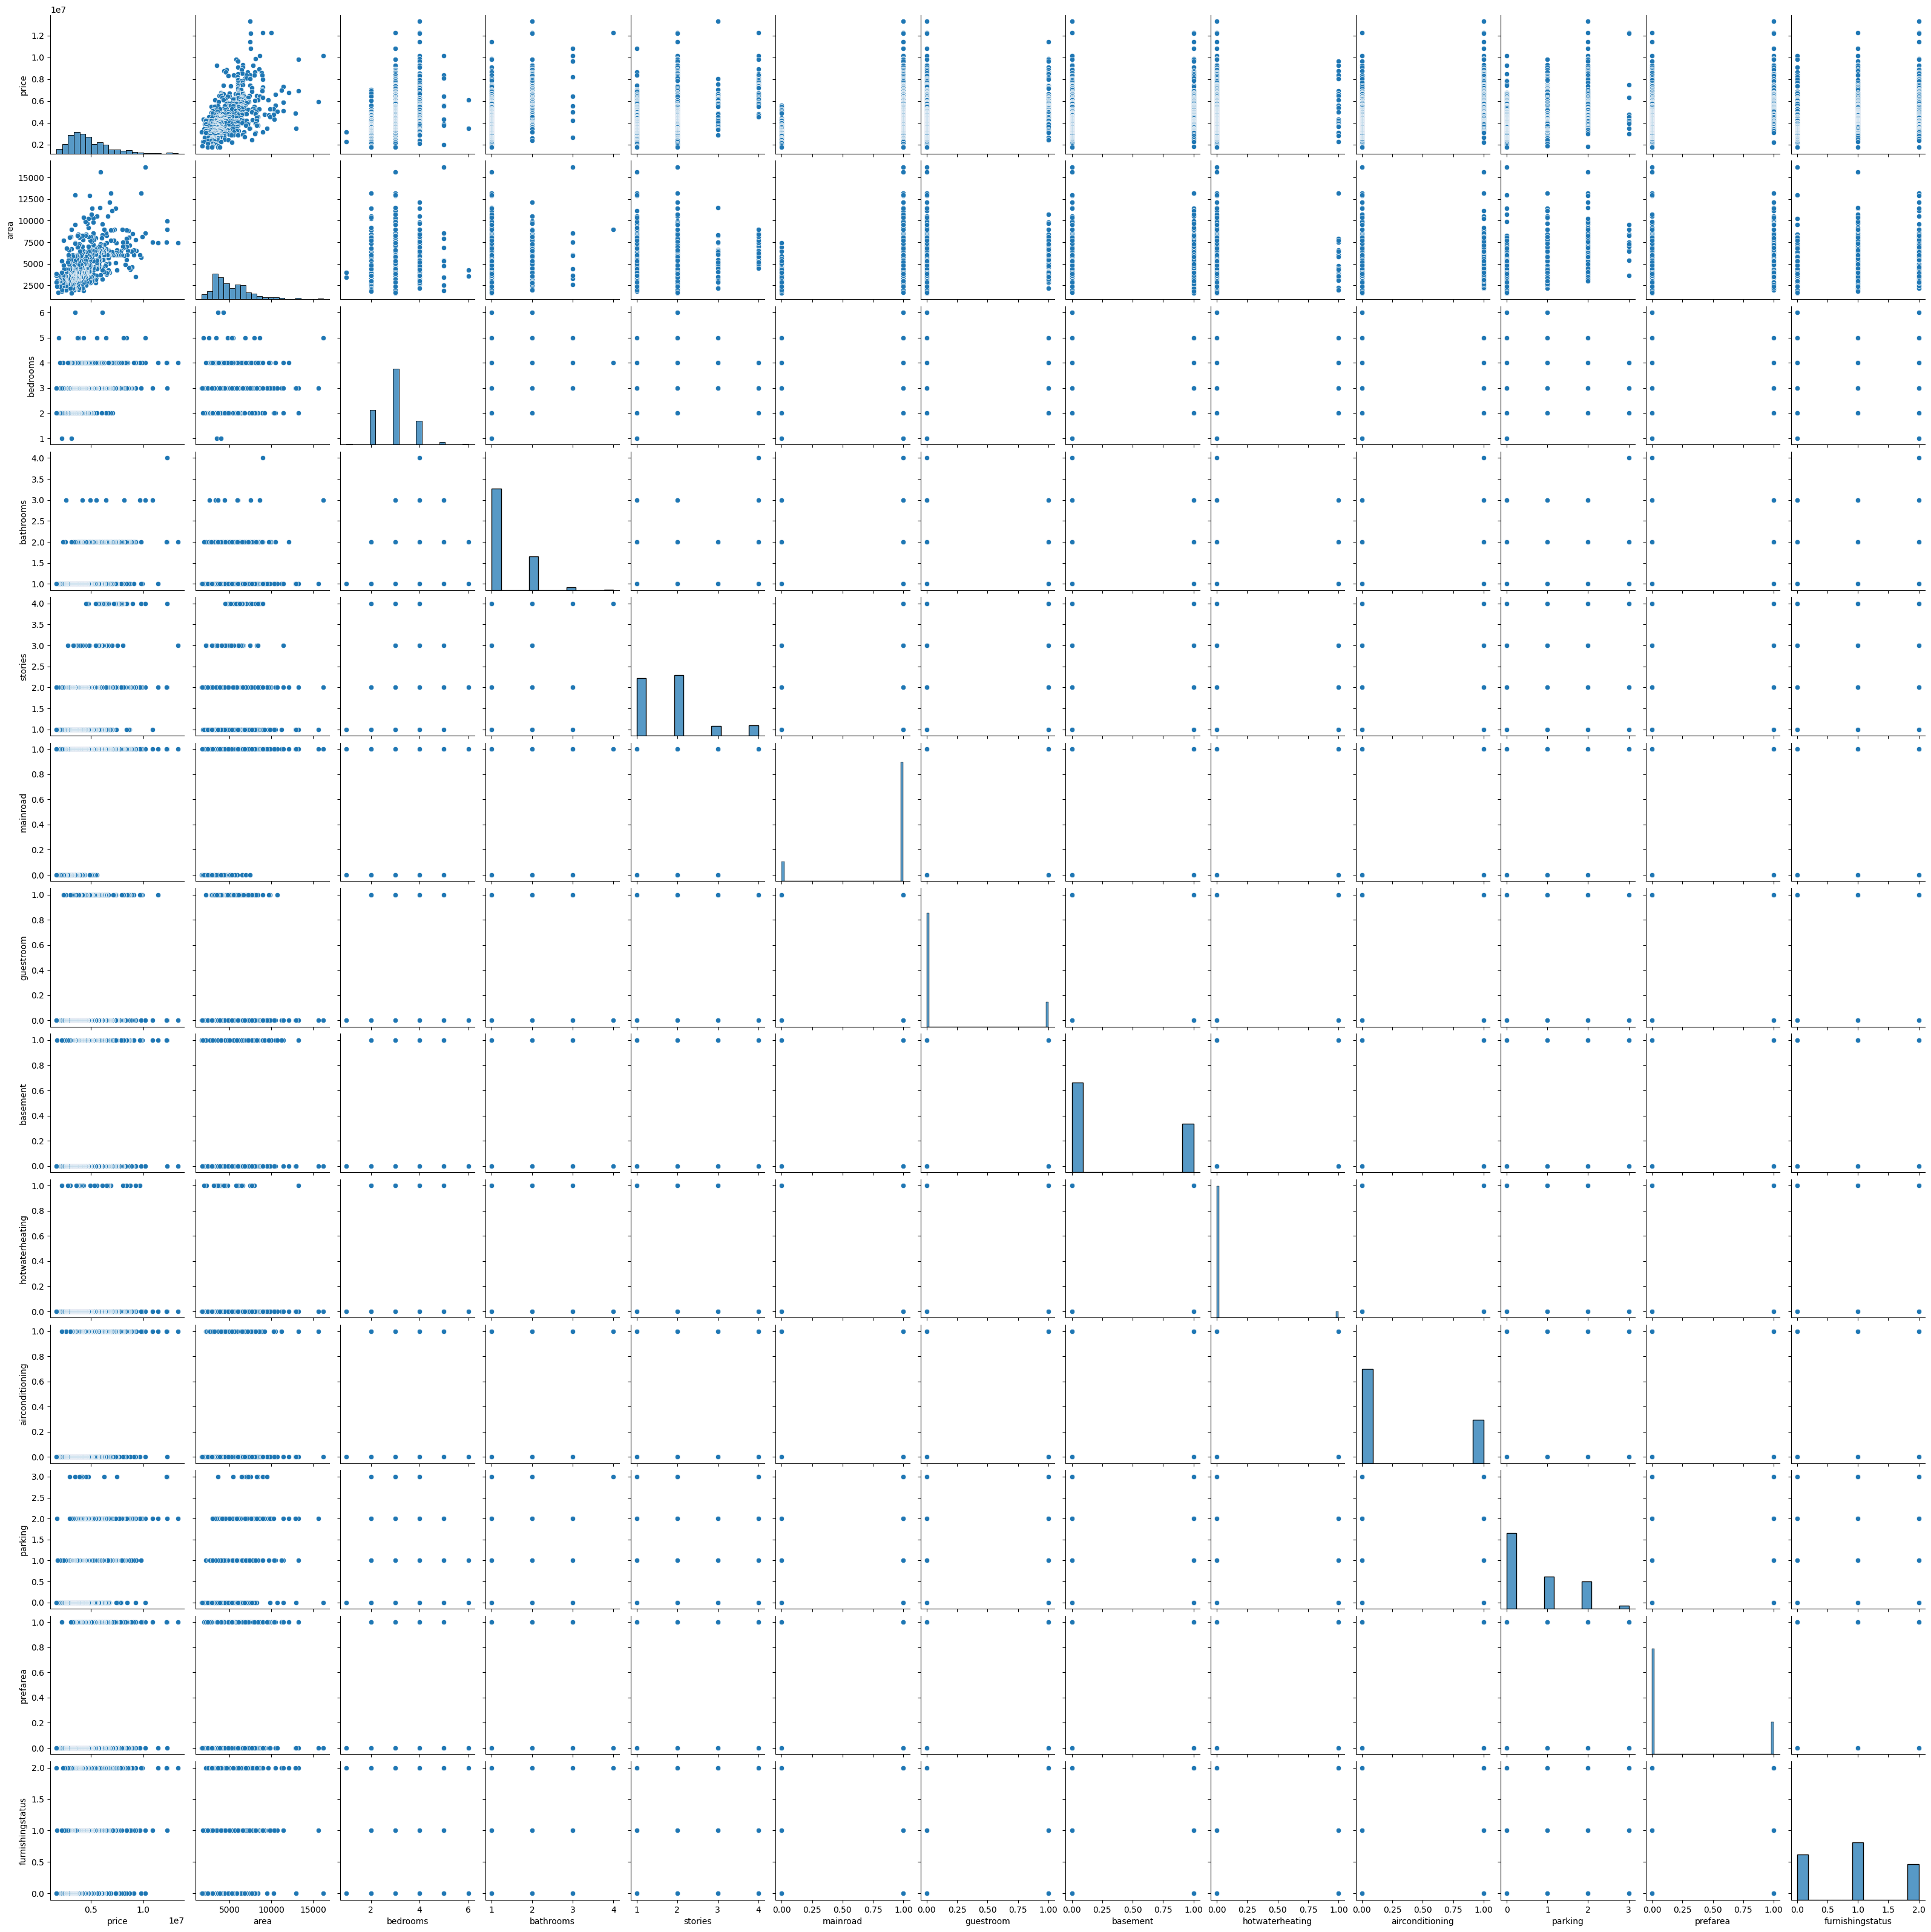

In [15]:
sns.pairplot(df)

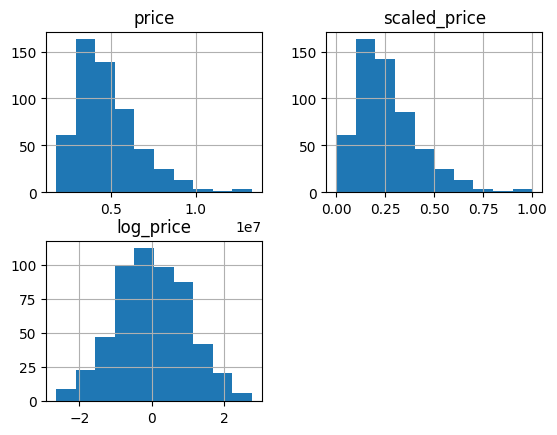

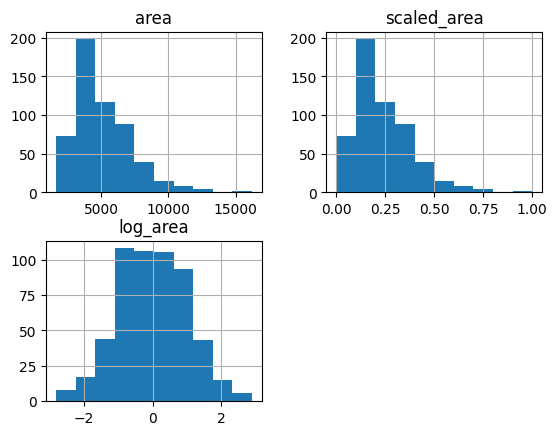

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

price_scaler = MinMaxScaler()
area_scaler = MinMaxScaler()


df["scaled_price"] = price_scaler.fit_transform(df[["price"]])
df["scaled_area"] = area_scaler.fit_transform(df[["area"]])

log_price = PowerTransformer()
log_area = PowerTransformer()


df["log_price"] = log_price.fit_transform(df[["price"]])
df["log_area"] = log_price.fit_transform(df[["area"]])

scaled_vs_log_price = df[["price", "scaled_price", "log_price"]].hist()
scaled_vs_log_are = df[["area", "scaled_area", "log_area"]].hist()


In [25]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,scaled_price,scaled_area,log_price,log_area
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,1.000000,0.396564,2.770977,1.115457
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,0.909091,0.502405,2.578756,1.559601
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0.909091,0.571134,2.578756,1.804291
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,0.906061,0.402062,2.572030,1.140991
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,0.836364,0.396564,2.410998,1.115457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0.006061,0.092784,-2.530392,-1.167310
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0.001485,0.051546,-2.620103,-1.770055
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0.000000,0.135395,-2.649870,-0.672559
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2,0.000000,0.086598,-2.649870,-1.248611


In [26]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,scaled_price,scaled_area,log_price,log_area
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02,5.450000e+02
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275,0.261189,0.240587,-1.835677e-14,-3.546195e-15
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373,0.161943,0.149151,1.000919e+00,1.000919e+00
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.649870e+00,-2.820162e+00
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.145455,0.134021,-6.848354e-01,-6.869862e-01
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.224242,0.202749,-3.865654e-02,-5.799972e-02
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.345455,0.323711,7.029461e-01,7.446617e-01
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000,2.770977e+00,2.888980e+00
